In [ ]:
 #importing the dataset from local drive
from google.colab import files


uploaded = files.upload()
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['iris - iris.csv']),sep=",")


Saving iris - iris.csv to iris - iris.csv


In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


The Iris Dataset shows three Iris species Setosa, Virginica and Versicolor and their characteristics in terms of sepal length and width as well as petal length and width.
We will build a KNN model to find which variety a flower belongs to ,based on the resemblance of its feature values to its neighbors feature values.

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Preprocessing

In [ ]:
print("The ,number of mising values is:")
df.isnull().sum().sum()

The ,number of mising values is:


0

In [ ]:
#Converting categorical data "Variety" to numerical data
df['variety']=df['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2})

In [ ]:
df["variety"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Choosing the features and the target 
x=df[['sepal.length','sepal.width','petal.length','petal.width']]
y=df['variety']
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#Data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
#building knn classifier with k=20
knn=KNeighborsClassifier(n_neighbors=20) 
#Fitting the training data
knn.fit(x_train,y_train) 
#Prediction
y_pred=knn.predict(x_test)  
y_pred

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 1])

In [ ]:
#Accuracy
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9666666666666667


Our model gave a very good accuracy score of 96.67%

In [ ]:
#Trying different k and finding their accuracies
k=int(input("Enter the maximum number of neighbors to try: "))
acc=[]
for i in range(1,k+1):
    knn=KNeighborsClassifier(k+1-i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',i,'is:',accuracy_score(y_pred,y_test))
    acc.append(accuracy_score(y_pred,y_test))

Enter the maximum number of neighbors to try: 20
Accuracy for k= 1 is: 0.9666666666666667
Accuracy for k= 2 is: 1.0
Accuracy for k= 3 is: 1.0
Accuracy for k= 4 is: 1.0
Accuracy for k= 5 is: 1.0
Accuracy for k= 6 is: 1.0
Accuracy for k= 7 is: 1.0
Accuracy for k= 8 is: 1.0
Accuracy for k= 9 is: 1.0
Accuracy for k= 10 is: 1.0
Accuracy for k= 11 is: 0.9666666666666667
Accuracy for k= 12 is: 1.0
Accuracy for k= 13 is: 0.9666666666666667
Accuracy for k= 14 is: 0.9666666666666667
Accuracy for k= 15 is: 0.9333333333333333
Accuracy for k= 16 is: 0.9333333333333333
Accuracy for k= 17 is: 0.9
Accuracy for k= 18 is: 0.9333333333333333
Accuracy for k= 19 is: 0.9333333333333333
Accuracy for k= 20 is: 0.9


Text(0, 0.5, 'Testing Accuracy')

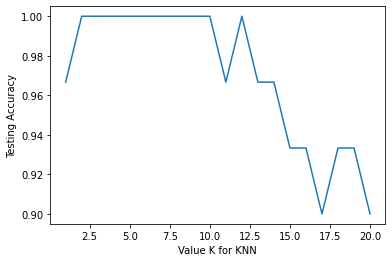

In [ ]:
#Plotting different K and their accuracies
import matplotlib.pyplot as plt
plt.plot(range(1,k+1),acc)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')